Week - 5  Building a CNN for Image Classification

Design and implement a CNN model (with 4+ layers of convolutions) to classify multi category image datasets. Use the concept of regularization and dropout while designing the CNN model.

Use CIFAR-10 dataset.

Record the Training accuracy and Test accuracy corresponding to the following architectures:

       a. Base Model

       b. Model with L1 Regularization

       c. Model with L2 Regularization

       d. Model with Dropout

       e. Model with both L2 (or L1) and Dropout

Dataset:  https://www.kaggle.com/c/cifar-10/

**Base Model:**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2665 - loss: 1.9367
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5082 - loss: 1.3578
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5791 - loss: 1.1854
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6233 - loss: 1.0579
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6526 - loss: 0.9780
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6465 - loss: 1.0180
Test loss: 1.0290404558181763
Test accuracy: 0.640500009059906
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted label: 3
True label: 3


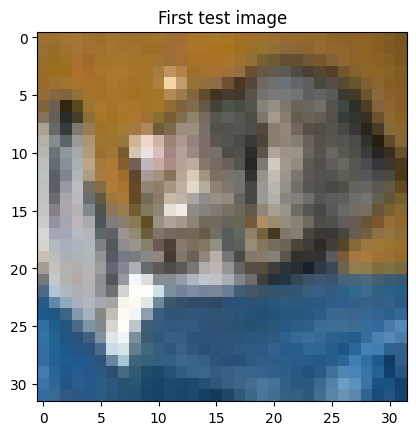

In [1]:
#Base Model
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 32, 32, 3).astype('float32') / 255
test_X = test_X.reshape(-1, 32, 32, 3).astype('float32') / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Build model
model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(28, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Prediction
predictions = model.predict(test_X)
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_Y[0][0])

# Show image
plt.imshow(test_X[0])
plt.title("First test image")
plt.show()


**Model with L1 Regularization**

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.0958 - loss: 13.9046
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1003 - loss: 2.7966
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1027 - loss: 2.7964
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1010 - loss: 2.7966
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0966 - loss: 2.7965
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1006 - loss: 2.8018
Test loss: 2.8017382621765137
Test accuracy (L1 Regularized): 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted label: 2
True label: 3


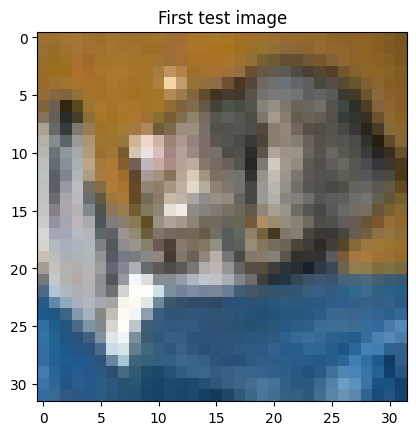

In [2]:
# L1 Regularizer
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l1
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 32, 32, 3).astype('float32') / 255
test_X = test_X.reshape(-1, 32, 32, 3).astype('float32') / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Define L1-regularized model
model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l1(0.01)))
model.add(Conv2D(28, (3,3), activation='relu', kernel_regularizer=l1(0.01)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile, train, evaluate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy (L1 Regularized):', test_acc)

# Predict and show
predictions = model.predict(test_X)
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_Y[0][0])
plt.imshow(test_X[0])
plt.title("First test image")
plt.show()

**Model with L2 Regularization**

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.1985 - loss: 2.6524
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.2965 - loss: 1.9993
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3628 - loss: 1.8736
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3928 - loss: 1.8128
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4237 - loss: 1.7505
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4370 - loss: 1.7168
Test loss: 1.716078758239746
Test accuracy: 0.43540000915527344
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted label: 3
True label: 3


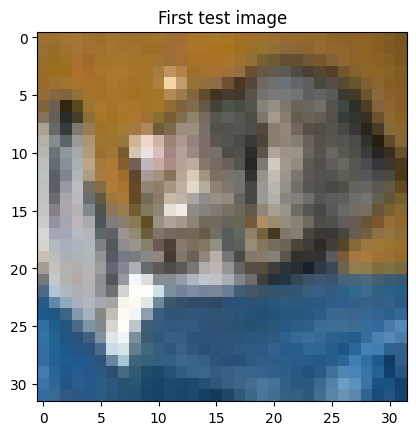

In [3]:
# L2 regularizer
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 32, 32, 3).astype('float32') / 255
test_X = test_X.reshape(-1, 32, 32, 3).astype('float32') / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Define L2-regularized model
model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(28, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, epochs=5, batch_size=64)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

predictions = model.predict(test_X)
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_Y[0][0])
plt.imshow(test_X[0])
plt.title("First test image")
plt.show()

**Model with Dropout**

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.2211 - loss: 2.0222
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4546 - loss: 1.4921
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5289 - loss: 1.3078
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5688 - loss: 1.2019
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6056 - loss: 1.1154
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6272 - loss: 1.0441
Test loss: 1.0432709455490112
Test accuracy: 0.6319000124931335
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted label: 3
True label: 3


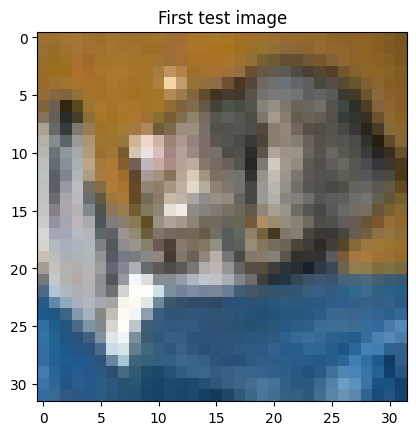

In [4]:
#Dropout
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 32, 32, 3).astype('float32') / 255
test_X = test_X.reshape(-1, 32, 32, 3).astype('float32') / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Build model with Dropout
model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(28, (3,3), activation='relu'))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(10, activation='softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, epochs=5, batch_size=64)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and display
predictions = model.predict(test_X)
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_Y[0][0])
plt.imshow(test_X[0])
plt.title("First test image")
plt.show()

**Model with both L2 (or L1) and Dropout**

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.1003 - loss: 2.8089
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1024 - loss: 2.3027
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0992 - loss: 2.3027
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0974 - loss: 2.3027
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0993 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0988 - loss: 2.3026
Test loss: 2.3025901317596436
Test accuracy: 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted label: 7
True label: 3


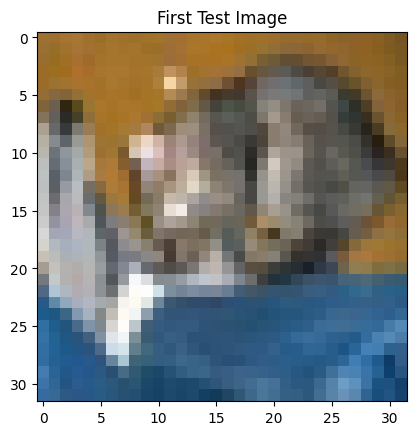

In [5]:
# L2 regularizer and Dropout
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 32, 32, 3).astype('float32') / 255
test_X = test_X.reshape(-1, 32, 32, 3).astype('float32') / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Model with L2 Regularization + Dropout
model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(28, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.20))
model.add(Dense(10, activation='softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, epochs=5, batch_size=64)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and display
predictions = model.predict(test_X)
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_Y[0][0])
plt.imshow(test_X[0])
plt.title("First Test Image")
plt.show()